In [ ]:

# Install required packages (only needed once)
!pip install opencv-python matplotlib

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving images.jpeg to images (1).jpeg


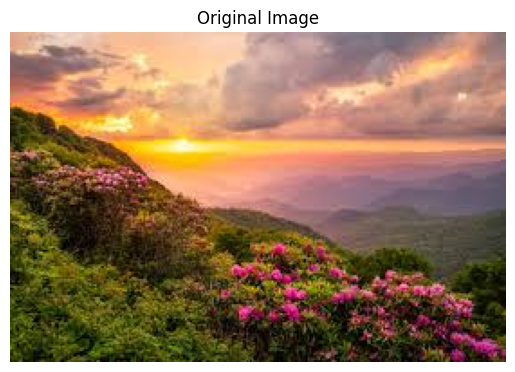

Encryption complete!


In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# ASCII mappings
char_to_ascii = {chr(i): i for i in range(255)}

# Load image
image_path = "images.jpeg"
image = cv2.imread(image_path)
xrgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Message and key
message = "secret"
key = "123123"

# Convert to ASCII
text_ascii = [char_to_ascii[ch] for ch in message]
key_ascii = [char_to_ascii[ch] for ch in key]

# Encrypt using XOR and embed in image
x_enc = image.copy()
n, m, z = 0, 0, 0
for i in range(len(message)):
    new_val = text_ascii[i] ^ key_ascii[i]
    x_enc[n, m, z] = new_val

    z += 1
    if z == 3:
        z = 0
        m += 1
        if m == x_enc.shape[1]:
            m = 0
            n += 1

# Save the encrypted image
cv2.imwrite("stego_output.png", x_enc)
print("Encryption complete!")


In [ ]:
#Download the image
from google.colab import files
files.download("stego_output.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

ascii_to_char = {i: chr(i) for i in range(255)}
key_ascii = [char_to_ascii[ch] for ch in key]
msg_len = len(key_ascii)

# Load stego image
stego_image = cv2.imread("stego_output.png")
n, m, z = 0, 0, 0
recovered_ascii = []

for i in range(msg_len):
    enc_val = stego_image[n, m, z]
    orig_val = enc_val ^ key_ascii[i]
    recovered_ascii.append(orig_val)

    z += 1
    if z == 3:
        z = 0
        m += 1
        if m == stego_image.shape[1]:
            m = 0
            n += 1

recovered_text = ''.join([ascii_to_char[val] for val in recovered_ascii])
print("Decrypted message:", recovered_text)


Decrypted message: secret
